In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [30]:
from scipy import stats

In [44]:
from sklearn.model_selection import train_test_split

In [2]:
trainData = pd.read_csv('train_LZdllcl.csv')

In [3]:
trainData.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
len(trainData)

54808

In [41]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Without any preprocessing

In [24]:
trainData['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [37]:
stats.mode(trainData['previous_year_rating'])[0][0]

3.0

In [40]:
trainData['education'] = trainData['education'].fillna(stats.mode(trainData['education'])[0][0])
trainData['previous_year_rating'] = trainData['previous_year_rating'].fillna(stats.mode(trainData['previous_year_rating'])[0][0])


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [42]:
trainData = pd.get_dummies(trainData)

In [43]:
trainData.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split?

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(trainData.drop(['is_promoted', 'employee_id'], axis = 1), trainData['is_promoted']
                                                    , test_size = 0.2, random_state = 42)

In [70]:
from sklearn.metrics import f1_score, classification_report

In [57]:
from sklearn.model_selection import GridSearchCV

In [74]:
lr = LogisticRegression()

params = {"C": [1,0.1,0.01], "class_weight": [None, "balanced"], "penalty" : ['l1', 'l2']}
gridSearchCV = GridSearchCV(lr, params, n_jobs = -1, cv = 5, refit = True)
gridSearchCV.fit(X_train, Y_train)
print(gridSearchCV.best_estimator_)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [68]:
#gridSearchCV.best_estimator_.fit(X_train, Y_train)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
f1_score(Y_test, gridSearchCV.best_estimator_.predict(X_test))

0.3893510815307821

In [78]:
print(classification_report(Y_test,  lr_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.26      0.39       908

    accuracy                           0.93     10962
   macro avg       0.86      0.63      0.68     10962
weighted avg       0.92      0.93      0.92     10962



In [80]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
y_pred = xgb_clf.predict(X_test)

In [86]:
f1_score(Y_test,  xgb_clf.predict(X_test))

0.4013900955690703

In [85]:
print(classification_report(Y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.95      0.25      0.40       908

    accuracy                           0.94     10962
   macro avg       0.94      0.63      0.68     10962
weighted avg       0.94      0.94      0.92     10962



### After Normalising

In [87]:
from sklearn.preprocessing import RobustScaler

In [89]:
import pickle

In [88]:
r_Scaler = RobustScaler().fit(X_train)

In [93]:
pickle.dump?

In [96]:
# Save the scaler
fileName = 'trainRobustScaler.pkl'
with open(fileName, 'wb') as fileWrite:
    pickle.dump(r_Scaler, fileWrite)

In [99]:
X_train_scaled = r_Scaler.transform(X_train)

In [101]:
X_train_scaled

array([[ 0. , -0.2,  2. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.1, -2. , ..., -1. ,  0. ,  1. ],
       [ 2. , -0.4,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0.1,  2. , ..., -1. ,  0. ,  1. ],
       [ 2. ,  0.2,  2. , ...,  0. ,  0. ,  0. ],
       [ 0. , -0.3, -2. , ..., -1. ,  0. ,  1. ]])

In [108]:
xgb_clf_scaled = xgb.XGBClassifier()
paramsScaled = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf_scaled = GridSearchCV(xgb_clf_scaled, paramsScaled )
grid_clf_scaled.fit(X_train_scaled, Y_train)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [20, 100]},
             pre_dispatch='2*n_jo

In [105]:
X_test_scaled = r_Scaler.transform(X_test)

In [110]:
print(classification_report(Y_test, grid_clf_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.95      0.32      0.48       908

    accuracy                           0.94     10962
   macro avg       0.95      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [111]:
lrScaled = LogisticRegression()

params = {"C": [1,0.1,0.01], "class_weight": [None, "balanced"], "penalty" : ['l1', 'l2']}
gridSearchCVLrScaled = GridSearchCV(lrScaled, params, n_jobs = -1, cv = 5, refit = True)
gridSearchCVLrScaled.fit(X_train_scaled, Y_train)
print(gridSearchCVLrScaled.best_estimator_)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [113]:
print(classification_report(Y_test, gridSearchCVLrScaled.best_estimator_.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.26      0.39       908

    accuracy                           0.93     10962
   macro avg       0.86      0.63      0.68     10962
weighted avg       0.92      0.93      0.92     10962



### UnderSampling

In [300]:
trainFile = pd.read_csv('train_LZdllcl.csv')

In [116]:
trainFile.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [124]:
trainFile.groupby(['gender']).agg({'is_promoted': ['sum', 'mean']})

is_promoted          
               sum      mean
gender                      
f             1467  0.089934
m             3201  0.083151

In [128]:
trainData.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [138]:
dataToSample = pd.concat([X_train, Y_train], axis = 1)

In [139]:
dataToSample.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
3872,1,31,5.0,5,1,0,48,0,0,0,...,0,1,0,0,0,1,1,0,0,0
11619,1,34,1.0,4,0,0,78,0,0,0,...,0,0,0,1,0,1,0,0,1,0
36178,3,29,4.0,4,1,0,77,0,0,0,...,0,1,0,0,0,1,1,0,0,0
29884,1,54,4.0,15,1,0,47,0,0,0,...,0,0,0,1,0,1,1,0,0,1
22968,1,31,5.0,6,0,0,86,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [143]:
underSampledData = pd.concat([dataToSample[dataToSample['is_promoted'] == 1], 
                             dataToSample[dataToSample['is_promoted'] == 0].sample(n = dataToSample[dataToSample['is_promoted'] == 1].shape[0])], 
                             axis = 0).sample(frac = 1)

In [145]:
underSampledData[underSampledData['is_promoted'] == 1].shape

(3760, 59)

In [144]:
underSampledData.shape

(7520, 59)

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
correlation_undersampled = underSampledData.corr()

In [160]:
correlation_undersampled[(correlation_undersampled['is_promoted'] > 0.1) | (correlation_undersampled['is_promoted'] < -0.1)].index

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

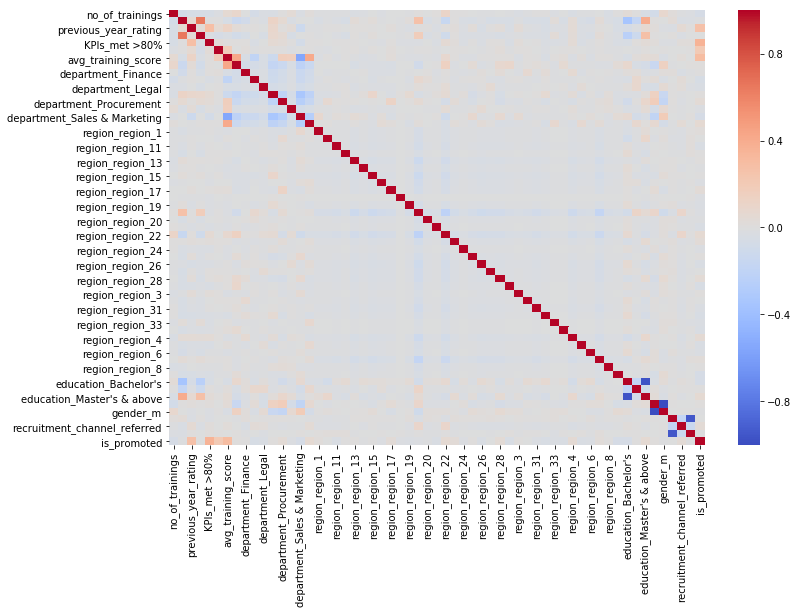

In [148]:
plt.figure(figsize=(12,8))
sns.heatmap(underSampledData.corr(), cmap = 'coolwarm')
plt.show()

In [156]:
xgb_underSampled = xgb.XGBClassifier()
paramsUnderSampled = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf_underSampled = GridSearchCV(xgb_underSampled, paramsUnderSampled )
grid_clf_underSampled.fit(underSampledData.drop(['is_promoted'], axis = 1), underSampledData['is_promoted'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [20, 100]},
             pre_dispatch='2*n_jo

In [158]:
print(classification_report(Y_test, grid_clf_underSampled.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10054
           1       0.24      0.92      0.38       908

    accuracy                           0.75     10962
   macro avg       0.61      0.82      0.61     10962
weighted avg       0.93      0.75      0.80     10962



In [162]:
xgb_underSampled2 = xgb.XGBClassifier()
paramsUnderSampled2 = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf_underSampled2 = GridSearchCV(xgb_underSampled2, paramsUnderSampled2 )
grid_clf_underSampled2.fit(underSampledData[['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']],
                           underSampledData['is_promoted'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [20, 100]},
             pre_dispatch='2*n_jo

In [164]:
print(classification_report(Y_test, grid_clf_underSampled2.best_estimator_.predict(X_test[['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']])))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79     10054
           1       0.19      0.88      0.32       908

    accuracy                           0.68     10962
   macro avg       0.59      0.77      0.56     10962
weighted avg       0.92      0.68      0.75     10962



### UnderSampling for scaled data

In [169]:
underSampledDataScaledX = r_Scaler.transform(underSampledData.drop(['is_promoted'], axis = 1))

In [171]:
xgb_underSampled = xgb.XGBClassifier()
paramsUnderSampled = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf_underSampled = GridSearchCV(xgb_underSampled, paramsUnderSampled )
grid_clf_underSampled.fit(underSampledDataScaledX, underSampledData['is_promoted'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [20, 100]},
             pre_dispatch='2*n_jo

In [172]:
print(classification_report(Y_test, grid_clf_underSampled.best_estimator_.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     10054
           1       0.24      0.92      0.38       908

    accuracy                           0.75     10962
   macro avg       0.61      0.82      0.61     10962
weighted avg       0.93      0.75      0.80     10962



### BoxPlots

In [173]:
trainFile.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Text(0.5, 1.0, 'is_promoted vs avg_training_score')

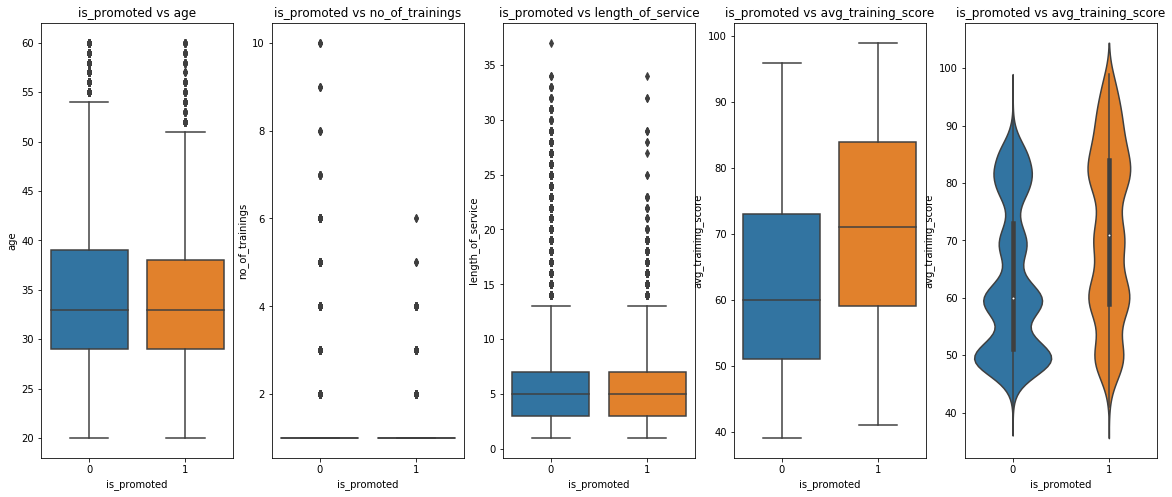

In [199]:
figure, axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,8))
sns.boxplot(x = 'is_promoted', y='age', data = trainFile, ax=axes[0])
axes[0].set_title('is_promoted vs age')

# sns.boxplot(x = 'is_click', y = 'app_code', data = underSampledDataSet, ax = axes[0,1])
# axes[0,1].set_title('app_code vs is_click')


sns.boxplot(x = 'is_promoted', y='no_of_trainings', data = trainFile, ax=axes[1])
axes[1].set_title('is_promoted vs no_of_trainings')

sns.boxplot(x = 'is_promoted', y='length_of_service', data = trainFile, ax=axes[2])
axes[2].set_title('is_promoted vs length_of_service')

sns.boxplot(x = 'is_promoted', y='avg_training_score', data = trainFile, ax=axes[3])
axes[3].set_title('is_promoted vs avg_training_score')

sns.violinplot(x = 'is_promoted', y='avg_training_score', data = trainFile, ax=axes[4])
axes[4].set_title('is_promoted vs avg_training_score')





### With Preprocessing

In [200]:
trainData['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [201]:
trainData.groupby(['no_of_trainings']).agg({'is_promoted': 'mean'})

,is_promoted
no_of_trainings,
1,0.088107
2,0.075748
3,0.068694
4,0.055556
5,0.023438
6,0.045455
7,0.000000
8,0.000000
9,0.000000


In [267]:
group_no_of_trainings = [[1,2], []]
trainData['no_of_trainings_cat'] = trainData['no_of_trainings'].apply(lambda x: 
                                    1 if(x in group_no_of_trainings[0]) else
                                    2 if(x > 6) else 3).astype('category')                            

In [216]:
trainData.groupby(['length_of_service']).agg({'is_promoted': 'mean'})

,is_promoted
length_of_service,
1,0.082912
2,0.089019
3,0.086592
4,0.087478
5,0.081447
6,0.084706
7,0.083589
8,0.093306
9,0.087105


In [268]:
groups_length_of_service = [[34,32], [37, 33, 31, 30, 26, 24]]
trainData['length_of_service_cat'] = trainData['length_of_service'].apply(lambda x: 
                                    1 if(x in groups_length_of_service[0]) else
                                    2 if(x in groups_length_of_service[1]) else 3).astype('category')                          

In [240]:
trainData['avg_training_score_cat'] = trainData['avg_training_score']//5

In [241]:
trainData.groupby(['avg_training_score_cat']).agg({"is_promoted":"mean"})

,is_promoted
avg_training_score_cat,
7,0.000000
8,0.033113
9,0.039396
10,0.041126
11,0.064433
12,0.079856
13,0.094560
14,0.123830
15,0.089782


In [269]:
trainData['avg_training_score_cat'] = trainData['avg_training_score_cat'].apply(lambda x:
                                      1 if(x < 11) else 
                                      2 if(x >17 ) else 3).astype('category')

In [270]:
trainData['age_cat'] = (trainData['age']//5).astype('category')

In [254]:
trainData.groupby(['age_cat']).agg({"is_promoted":"mean"})

,is_promoted
age_cat,
4,0.076385
5,0.085963
6,0.090252
7,0.092635
8,0.078956
9,0.064741
10,0.067595
11,0.063218
12,0.064516


In [255]:
trainData.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_cat,length_of_service_cat,avg_training_score_cat,age_cat
0,65438,1,35,5.0,8,1,0,49,0,0,...,1,1,0,0,0,1,1,3,1,7
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,1,0,0,1,3,3,6
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,1,1,3,1,6
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,1,0,0,1,3,1,7
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,1,0,0,1,3,3,9


In [256]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 64 columns):
employee_id                     54808 non-null int64
no_of_trainings                 54808 non-null int64
age                             54808 non-null int64
previous_year_rating            54808 non-null float64
length_of_service               54808 non-null int64
KPIs_met >80%                   54808 non-null int64
awards_won?                     54808 non-null int64
avg_training_score              54808 non-null int64
is_promoted                     54808 non-null int64
department_Analytics            54808 non-null uint8
department_Finance              54808 non-null uint8
department_HR                   54808 non-null uint8
department_Legal                54808 non-null uint8
department_Operations           54808 non-null uint8
department_Procurement          54808 non-null uint8
department_R&D                  54808 non-null uint8
department_Sales & Marketing    54808 non

In [271]:
trainData2 = pd.get_dummies(trainData)

In [279]:
trainData2.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,avg_training_score_cat_1,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_cat_10,age_cat_11,age_cat_12
0,65438,1,35,5.0,8,1,0,49,0,0,...,1,0,0,0,1,0,0,0,0,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,1,0,0,1,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,1,0,0,1,0,0,0,0,0,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,1,0,0,0,1,0,0,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,1,0,0,0,0,0,1,0,0,0


In [280]:
X_train_processed, X_test_processed, Y_train_processed, Y_test_processed = train_test_split(
   trainData2.drop(['is_promoted', 'employee_id'], axis = 1), 
   trainData2['is_promoted'], test_size =0.2, random_state = 42)

In [281]:
r_scaler_processed = RobustScaler().fit(X_train_processed)
X_train_processed_scaled = r_scaler_processed.transform(X_train_processed)

In [282]:
xgb_processed = xgb.XGBClassifier()
paramsScaled = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf_scaled = GridSearchCV(xgb_processed, paramsScaled )
grid_clf_scaled.fit(X_train_processed_scaled, Y_train_processed)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'n_estimators': [20, 100]},
             pre_dispatch='2*n_jo

In [283]:
print(classification_report(Y_test_processed, grid_clf_scaled.predict(r_scaler_processed.transform(X_test_processed))))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.97      0.32      0.48       908

    accuracy                           0.94     10962
   macro avg       0.95      0.66      0.72     10962
weighted avg       0.94      0.94      0.93     10962



In [285]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
rnd_clf = RandomForestClassifier()
params = {"n_estimators": [50,100], "max_depth" : [10,20,30] }
grid_rnd_clf = GridSearchCV(rnd_clf, params)
grid_rnd_clf.fit(X_train_processed_scaled, Y_train_processed)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [293]:
grid_rnd_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [294]:
print(classification_report(Y_test_processed, grid_rnd_clf.best_estimator_.predict(r_scaler_processed.transform(X_test_processed))))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.89      0.25      0.39       908

    accuracy                           0.94     10962
   macro avg       0.91      0.62      0.68     10962
weighted avg       0.93      0.94      0.92     10962



### Further checking

In [306]:
trainFile = pd.read_csv('train_LZdllcl.csv')

In [311]:
trainFile.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


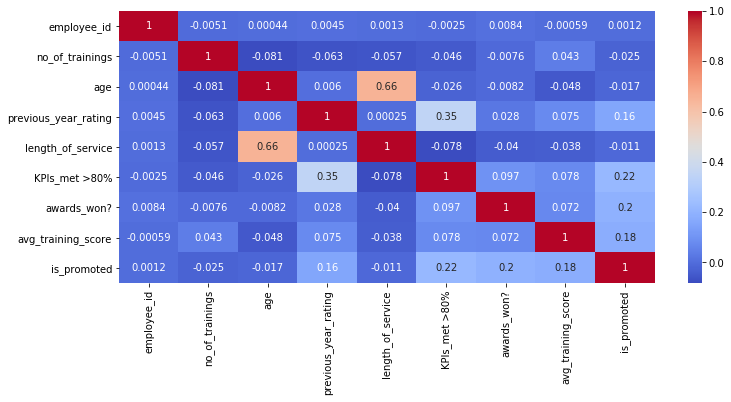

In [314]:
plt.figure(figsize=(12,5))
sns.heatmap(trainFile.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [309]:
trainFileProcessed = trainFile.copy()

In [366]:
trainFileProcessedAge = trainFileProcessed.groupby('age').agg({'is_promoted': 'mean'})

In [379]:
trainFileProcessedAge.reset_index()['is_promoted'].head()

0    0.035398
1    0.051020
2    0.077922
3    0.079439
4    0.082840
Name: is_promoted, dtype: float64

In [373]:
trainFileProcessedAge.columns = ['age', 'is_promoted']
# trainFileProcessedAge['age'].head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

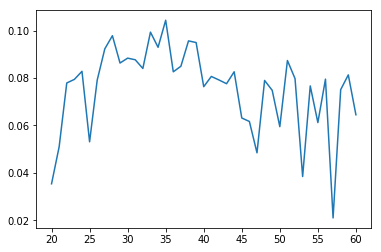

In [380]:
plt.plot(trainFileProcessedAge.reset_index()['age'], trainFileProcessedAge.reset_index()['is_promoted'])

In [387]:
trainFileProcessed['age_cat'] = trainFileProcessed['age'].apply(lambda x: 1 if(27 <= x <= 37) else 2)
trainFileProcessed['dept_cat'] = trainFileProcessed['department'].apply(lambda x: 0 if x in ['HR', 'Legal', 'R&D', 'Sales & Marketing']
                                                                       else 1)

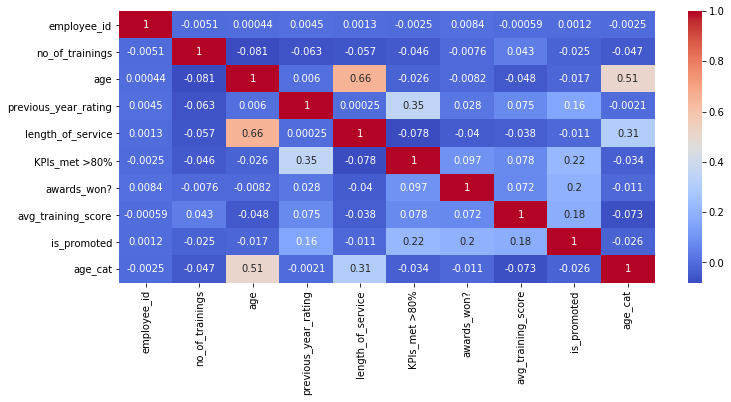

In [388]:
plt.figure(figsize=(12,5))
sns.heatmap(trainFileProcessed.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [334]:
corr = trainFileProcessed.corr()

In [423]:
trainregion = trainFileProcessed.groupby('recruitment_channel').agg({'is_promoted': 'mean'}).reset_index()

In [424]:
trainregion

,recruitment_channel,is_promoted
0,other,0.083952
1,referred,0.120841
2,sourcing,0.085013


In [404]:
['region_18','region_24','region_33','region_34','region_9']
trainregion

,region,is_promoted
0,region_1,0.095082
1,region_10,0.078704
2,region_11,0.056274
3,region_12,0.066000
4,region_13,0.086858
5,region_14,0.074970
6,region_15,0.079060
7,region_16,0.069625
8,region_17,0.136935
9,region_18,0.032258


In [425]:
trainFileProcessed['recruitment_cat'] = trainFileProcessed['recruitment_channel'].apply(lambda x: 0 if(x in ['other','sourcing'])
                                     else 1)

In [430]:
trainFileProcessed.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_cat', 'dept_cat',
       'region_cat', 'recruitment_cat'],
      dtype='object')

In [336]:
corr[corr['is_promoted'] > 0.1].index

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [337]:
columnsToUse = ['previous_year_rating', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'is_promoted', 'age_cat', 
                'no_of_trainings']

In [604]:
def XGBFitter(X_train, Y_train):
    xgbclf = xgb.XGBClassifier(random_state=42)
    params = {"learning_rate" : [0.1, 0.3], "max_depth" : [5, 10], "n_estimators" : [100, 200]}
    grid_clf = GridSearchCV(xgbclf, paramsScaled , refit=True)
    grid_clf.fit(X_train, Y_train)
    print(grid_clf.best_estimator_)
    return grid_clf

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [433]:
def spliiter_sacler(dataX, dataY):
    X_train , X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 42)
    rScaler = RobustScaler()
    rScaler.fit(X_train)
    X_train_scaled = rScaler.transform(X_train)
    X_test_scaled = rScaler.transform(X_test)
    return X_train_scaled , X_test_scaled, Y_train, Y_test
    
    

In [438]:
X_train, X_test, Y_train, Y_test = spliiter_sacler(trainFileProcessed[['previous_year_rating', 'KPIs_met >80%', 
                                    'awards_won?','avg_training_score', 'age', 'no_of_trainings',
                                    'dept_cat','region_cat', 'recruitment_cat']], 
                                    trainFileProcessed['is_promoted'])
model = XGBFitter(X_train, Y_train)
print(classification_report(Y_test, model.predict(X_test)))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.81      0.18      0.30       908

    accuracy                           0.93     10962
   macro avg       0.87      0.59      0.63     10962
weighted avg       0.92      0.93      0.91     10962



In [439]:
trainFileProcessed.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_cat', 'dept_cat',
       'region_cat', 'recruitment_cat'],
      dtype='object')

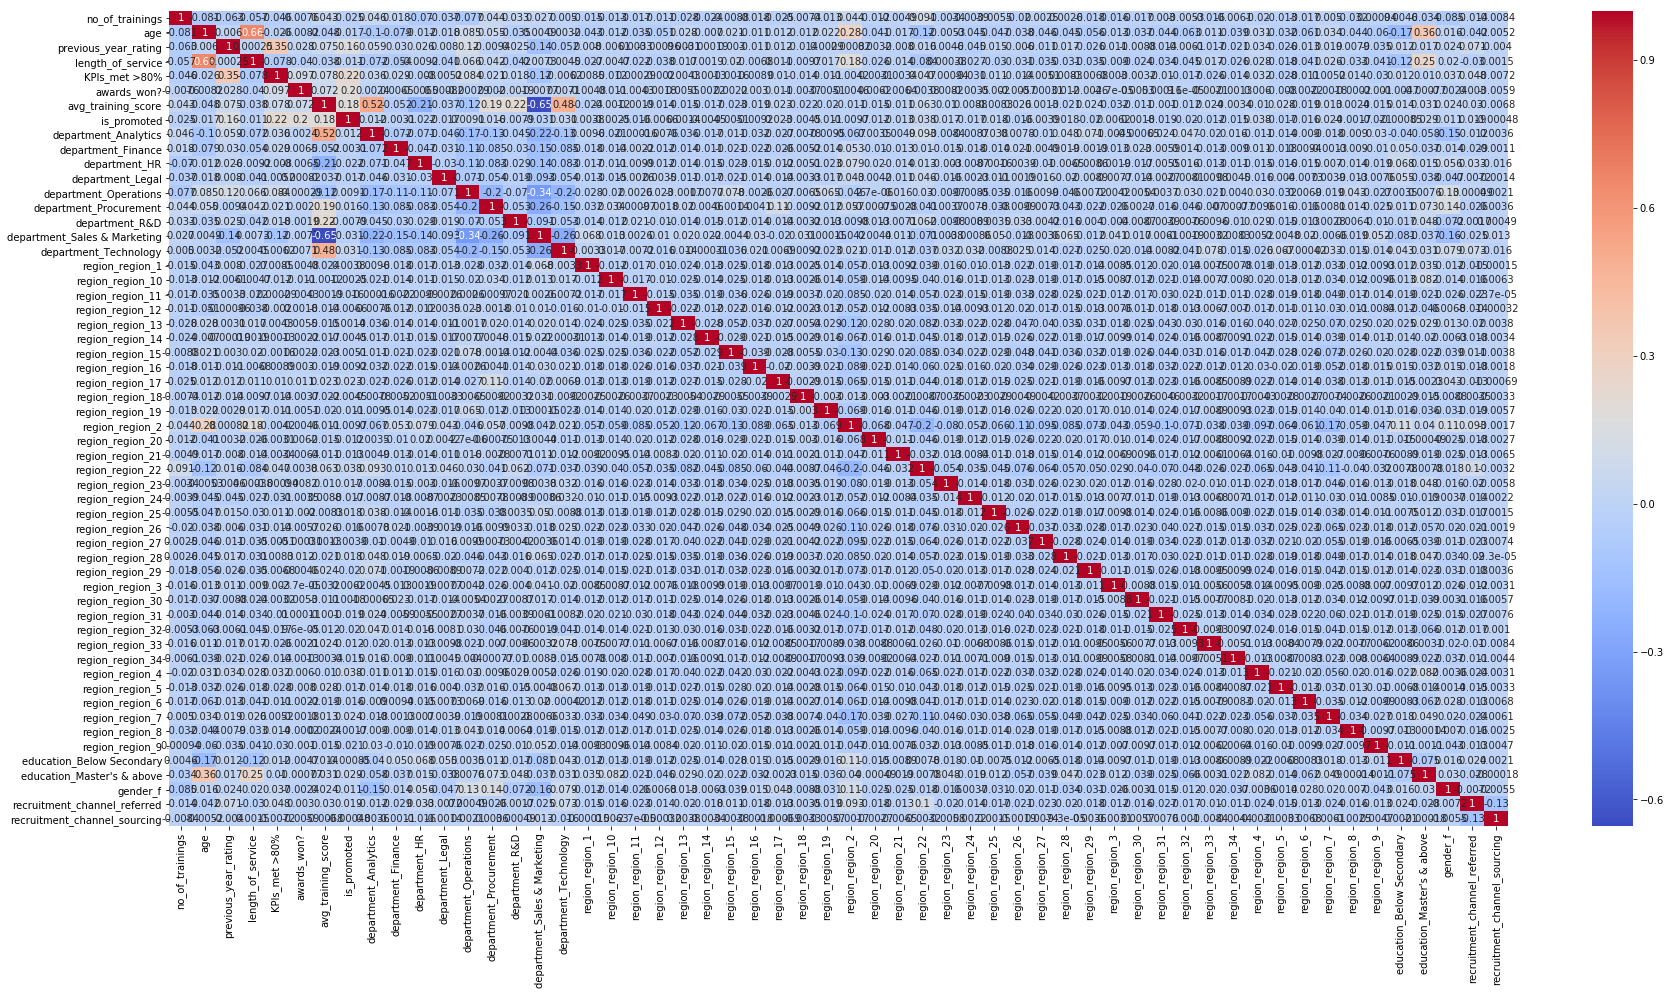

In [450]:
plt.figure(figsize=(30,15))
sns.heatmap(pd.get_dummies(trainFileProcessed.drop(['age_cat', 
            'employee_id','dept_cat','region_cat', 'recruitment_cat'], axis = 1)).drop(['gender_m', 
            'recruitment_channel_other', 'education_Bachelor\'s'], axis = 1).corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [584]:
X_train, X_test, Y_train, Y_test = spliiter_sacler(pd.get_dummies(trainFileProcessed.drop(['age_cat', 'is_promoted',
                                    'employee_id','dept_cat','region_cat', 'recruitment_cat'], axis = 1)), 
                                    trainFileProcessed['is_promoted'])
#model = XGBFitter(X_train, Y_train)
#print(classification_report(Y_test, model.predict(X_test)))

In [581]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [582]:
pca.explained_variance_ratio_

array([0.21794266, 0.20764492, 0.06815218, 0.06682809, 0.06002577,
       0.0525543 , 0.04896235, 0.03462295, 0.02932548, 0.02639948,
       0.02184515, 0.01836781, 0.01541954, 0.01357909, 0.01089235,
       0.00917083, 0.00694559, 0.00648876, 0.00618366, 0.00536227,
       0.00467398, 0.00423072, 0.00401357, 0.00394069, 0.0036136 ,
       0.00355706, 0.00337776, 0.00312255, 0.00305389, 0.00287731])

In [ ]:
model = XGBFitter(X_train, Y_train)
print(classification_report(Y_test, model.predict(X_test)))

In [592]:
Y_train.shape

(43846,)

In [586]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_train = tsne.fit_transform(X_train)
X_test = tsne.transform(X_test)

AttributeError: 'TSNE' object has no attribute 'transform'

In [602]:
X_train[:,1].shape, Y_train.shape

((43846,), (43846,))

In [587]:
plt.scatter?

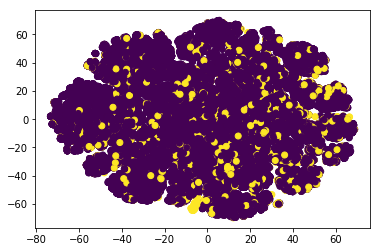

In [603]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)

In [653]:
rnd_frst = RandomForestClassifier()
params = {"n_estimators": [350,400], "max_depth" : [30,35]}
grid_rnd = GridSearchCV(rnd_frst, params, refit=True)
grid_rnd.fit(X_train, Y_train)
print(grid_rnd.best_estimator_)
print(classification_report(Y_test, grid_rnd.predict(X_test)))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.30      0.45       908

    accuracy                           0.94     10962
   macro avg       0.92      0.65      0.71     10962
weighted avg       0.94      0.94      0.92     10962



In [605]:
X_train, X_test, Y_train, Y_test = spliiter_sacler(pd.get_dummies(trainFileProcessed.drop(['age_cat', 'is_promoted',
                                    'employee_id','dept_cat','region_cat', 'recruitment_cat'], axis = 1)).drop(['gender_m', 
            'recruitment_channel_other', 'education_Bachelor\'s'], axis = 1), 
                                    trainFileProcessed['is_promoted'])
model = XGBFitter(X_train, Y_train)
print(classification_report(Y_test, model.predict(X_test)))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.32      0.48       908

    accuracy                           0.94     10962
   macro avg       0.95      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [619]:
preds = model.predict_proba(X_test)
preds1 = preds[:,1]
preds1 = preds1 > 0.26
preds1 = preds1.astype(int)
print(classification_report(Y_test, preds1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.72      0.40      0.51       908

    accuracy                           0.94     10962
   macro avg       0.83      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962



In [537]:
trainFileProcessed.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_cat', 'dept_cat',
       'region_cat', 'recruitment_cat'],
      dtype='object')

In [516]:
testData = pd.read_csv('test_2umaH9m.csv')

In [539]:
fullDataCat = pd.get_dummies(trainFileProcessed.drop(['age_cat', 'is_promoted',
                                    'employee_id','dept_cat','region_cat', 'recruitment_cat'], axis = 1)).drop(['gender_m', 
            'recruitment_channel_other', 'education_Bachelor\'s'], axis = 1)

In [517]:
testData.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [540]:
testDataCat = pd.get_dummies(testData.drop(['employee_id'], axis = 1)).drop(['gender_m', 
            'recruitment_channel_other', 'education_Bachelor\'s'], axis = 1)

In [ ]:
fullData

In [541]:
fullDataCat.shape , testDataCat.shape

((54808, 55), (23490, 55))

In [533]:
trainFile.shape

(54808, 14)

In [535]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [536]:
pd.merge(trainFile, testData, on='employee_id')

,employee_id,department_x,region_x,education_x,gender_x,recruitment_channel_x,no_of_trainings_x,age_x,previous_year_rating_x,length_of_service_x,...,education_y,gender_y,recruitment_channel_y,no_of_trainings_y,age_y,previous_year_rating_y,length_of_service_y,KPIs_met >80%_y,awards_won?_y,avg_training_score_y


In [538]:
testData['education'] = testData['education'].fillna(stats.mode(trainFile['education'])[0][0])
testData['previous_year_rating'] = testData['previous_year_rating'].fillna(stats.mode(trainFile['previous_year_rating'])[0][0])

trainFileProcessed['education'] = trainFileProcessed['education'].fillna(stats.mode(trainFile['education'])[0][0])
trainFileProcessed['previous_year_rating'] = trainFileProcessed['previous_year_rating'].fillna(stats.mode(trainFile['previous_year_rating'])[0][0])




c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [525]:
def full_scaler(dataXTrain, dataXTest):
    #X_train , X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 42)
    rScaler = RobustScaler()
    rScaler.fit(dataXTrain)
    X_train_scaled = rScaler.transform(dataXTrain)
    X_test_scaled = rScaler.transform(dataXTest)
    return X_train_scaled , X_test_scaled

In [542]:
Full_train , Full_test= full_scaler(fullDataCat , testDataCat)

In [543]:
Full_train.shape , Full_test.shape

((54808, 55), (23490, 55))

In [544]:
# def XGBFitter(X_train, Y_train):
xgbclf = xgb.XGBClassifier(random_state=42)
params = {"learning_rate" : [0.1, 0.05], "max_depth" : [3 , 5], "n_estimators" : [20, 100]}
grid_clf = GridSearchCV(xgbclf, params , refit=True)
grid_clf.fit(Full_train, trainFileProcessed['is_promoted'])
print(grid_clf.best_estimator_)


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [545]:
preds = grid_clf.predict(Full_test)

In [546]:
testData.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [548]:
testData['is_promoted'] = preds
testData[['employee_id', 'is_promoted']].to_csv('Predictions.csv', index = False)

In [486]:
preds = model.predict_proba(X_test)

In [512]:
preds1 = preds[:,1]

In [513]:
preds1 = preds1 > 0.3

In [514]:
preds1.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [555]:
preds = grid_clf.predict_proba(Full_test)
preds1 = preds[:,1]
preds1 = preds1 > 0.3
preds1 = preds1.astype(int)
# print(classification_report(Y_test, preds1))

In [556]:
preds1

array([0, 0, 0, ..., 0, 0, 1])

In [557]:
testData['is_promoted'] = preds1
testData[['employee_id', 'is_promoted']].to_csv('Predictions2.csv', index = False)

### LightGBM

In [656]:
import lightgbm as lgb

In [658]:
lgb.train?

In [863]:
X_train

array([[ 0.  ,  2.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -2.  , -0.25, ...,  1.  ,  0.  ,  0.  ],
       [ 2.  ,  1.  , -0.25, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  2.  ,  0.5 , ...,  1.  ,  0.  ,  0.  ],
       [ 2.  ,  2.  , -0.5 , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -2.  , -0.75, ...,  1.  ,  0.  ,  0.  ]])

In [854]:
trainFileProcessed['age_cat'] = trainFileProcessed['age_cat'].astype('category')

In [903]:
X_train, X_test, Y_train, Y_test = spliiter_sacler(pd.get_dummies(trainFileProcessed.drop(['age_cat', 'is_promoted',
                                    'employee_id','dept_cat','region_cat', 'recruitment_cat'], axis = 1)), 
                                    trainFileProcessed['is_promoted'])
#model = XGBFitter(X_train, Y_train)
#print(classification_report(Y_test, model.predict(X_test)))

In [909]:
params = {"learning_rate": [0.1, 0.3], "metric": ["f1"], "max_depth" : [10,20,30], "reg_alpha": [0.1,0.2,0.3], 
          "reg_lambda": [0.1, 0.2,0.3], "scale_pos_weight":[1, 2, 50], "n_jobs" : [-1]}
gbm = GridSearchCV(lgb.LGBMClassifier(), params, refit = True)
gbm.fit(X_train, Y_train)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_...0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [10, 20, 30],
    

In [922]:
print(preds1.shape, preds2.shape)
preds3 = np.bitwise_or(preds1, preds2)
print(preds3.shape)

(10962,) (10962,)
(10962,)


In [923]:
print(classification_report(Y_test, preds3))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10054
           1       0.46      0.53      0.50       908

    accuracy                           0.91     10962
   macro avg       0.71      0.74      0.72     10962
weighted avg       0.92      0.91      0.91     10962



In [926]:
print(gbm.best_estimator_)
preds = gbm.best_estimator_.predict_proba(X_test)
preds2 = preds[:,1]
preds2 = preds2 > 0.5
preds2 = preds2.astype(int)
print(classification_report(Y_test, preds2))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               metric='f1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.3,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.93      0.35      0.51       908

    accuracy                           0.94     10962
   macro avg       0.94      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [934]:
model.feature_importance(), model.feature_name()

(array([ 82, 298, 350, 203,  88, 875,  82,  28,  16,  12,  62,  59,  58,
         89,  44,   2,   1,  11,   6,   7,  12,   6,  11,  18,   0,   5,
         18,   1,   3,  63,  18,   8,  20,  14,   9,  24,   7,   7,   9,
         10,   6,   3,   9,  31,   3,   6,  31,   7,   9,  40,   3,  21,
         44,   0,  43,  23,  27,  58,   0]),
 ['Column_0',
  'Column_1',
  'Column_2',
  'Column_3',
  'Column_4',
  'Column_5',
  'Column_6',
  'Column_7',
  'Column_8',
  'Column_9',
  'Column_10',
  'Column_11',
  'Column_12',
  'Column_13',
  'Column_14',
  'Column_15',
  'Column_16',
  'Column_17',
  'Column_18',
  'Column_19',
  'Column_20',
  'Column_21',
  'Column_22',
  'Column_23',
  'Column_24',
  'Column_25',
  'Column_26',
  'Column_27',
  'Column_28',
  'Column_29',
  'Column_30',
  'Column_31',
  'Column_32',
  'Column_33',
  'Column_34',
  'Column_35',
  'Column_36',
  'Column_37',
  'Column_38',
  'Column_39',
  'Column_40',
  'Column_41',
  'Column_42',
  'Column_43',
  'Column_44'

In [905]:
lgtrain = lgb.Dataset(X_train, label=Y_train)
#lgval = lgb.Dataset(X_test, label=y_test)
#evals_result = {}
# params = {
#         "objective" : "binary",
#        "n_estimators":10000,
#        "reg_alpha" : 0.1,
#        "reg_lambda":0.1,
#        "n_jobs":-1,
#        "colsample_bytree":.8,
#        "min_child_weight":8,
#        "subsample":0.8715623,
#        "min_data_in_leaf":100,
#        "nthread":4,
#        "metric" : "f1",
#        "num_leaves" : 600,
#        "learning_rate" : 0.01,
#        "verbosity" : -1,
#        "seed": 120,
#        "max_bin":60,
#        'max_depth':15,
#        'min_gain_to_split':.0222415,
#        'scale_pos_weight':2
#     }
model = lgb.train({"learning_rate": 0.1, "metric": "f1", "max_depth" : 30, "reg_alpha": 0.2, "reg_lambda": 0.1,
                  "scale_pos_weight":1}, lgtrain)



In [908]:
preds = model.predict(X_test)
preds1 = preds
preds1 = preds1 > 0.29
preds1 = preds1.astype(int)
print(classification_report(Y_test, preds1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.73      0.39      0.51       908

    accuracy                           0.94     10962
   macro avg       0.84      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962



In [829]:
trainFile["abc"] = trainFile.groupby(["department"])['length_of_service'].mean()

In [833]:
trainFile[trainFile['abc'].isna() == False]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,abc


In [788]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True


def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result


pred_test, model, evals_result = run_lgb(X_train, X_test, Y_train, Y_test, Full_test)
print("LightGBM Training Completed...")

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.

Training until validation scores don't improve for 100 rounds.


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  '

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  '

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  '

[100]	training's f1: 0.350285	valid_1's f1: 0.319853
[200]	training's f1: 0.492555	valid_1's f1: 0.462171
[300]	training's f1: 0.533682	valid_1's f1: 0.497246
[400]	training's f1: 0.555898	valid_1's f1: 0.503422
[500]	training's f1: 0.575084	valid_1's f1: 0.508576
Early stopping, best iteration is:
[474]	training's f1: 0.570663	valid_1's f1: 0.511976
LightGBM Training Completed...


In [701]:
pred_test.shape

(23490,)

In [712]:
preds1 = pred_test
preds1 = preds1 > 0.43
preds1 = preds1.astype(int)
preds1
# print(classification_report(Y_test, preds1))

array([0, 0, 0, ..., 0, 0, 1])

In [713]:
testData['is_promoted'] = preds1
testData[['employee_id', 'is_promoted']].to_csv('Predictions_lgb4.csv', index = False)

In [ ]:
# To calculate F1 score
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True
LightGBM parameters :

def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

### Polynomial Features

In [297]:
from sklearn.preprocessing import PolynomialFeatures

In [623]:
poly = PolynomialFeatures(2)

In [624]:
X_train_Poly = poly.fit_transform(X_train)

In [655]:
model = XGBFitter(X_train_Poly, Y_train)
print(classification_report(Y_test, model.predict(poly.transform(X_test))))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.32      0.48       908

    accuracy                           0.94     10962
   macro avg       0.95      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [296]:
for i in ['region', 'department', 'education', 'gender', 'recruitment_channel']:
    print(trainFile.groupby([i]).agg({'is_promoted': 'mean'}))

           is_promoted
region                
region_1      0.095082
region_10     0.078704
region_11     0.056274
region_12     0.066000
region_13     0.086858
region_14     0.074970
region_15     0.079060
region_16     0.069625
region_17     0.136935
region_18     0.032258
region_19     0.060641
region_2      0.080126
region_20     0.057647
region_21     0.043796
region_22     0.114188
region_23     0.116596
region_24     0.035433
region_25     0.125763
region_26     0.063274
region_27     0.078963
region_28     0.116844
region_29     0.043260
region_3      0.106936
region_30     0.089802
region_31     0.056848
region_32     0.042328
region_33     0.037175
region_34     0.027397
region_4      0.144451
region_5      0.045692
region_6      0.046377
region_7      0.106546
region_8      0.080916
region_9      0.019048
                   is_promoted
department                    
Analytics             0.095665
Finance               0.081230
HR                    0.056245
Legal            

In [8]:
# Null Fieldss = ['education', 'previous_year_rating']
trainData['education'].value_counts()  # fill department and gender wise and is_promoted

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [10]:
trainData['previous_year_rating'].value_counts()  # 

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [12]:
a = trainData.groupby(['previous_year_rating'])

In [13]:
a.agg?

In [19]:
trainData.groupby(['previous_year_rating']).agg({'is_promoted': ['mean', 'sum', 'count']})

is_promoted             
                            mean   sum  count
previous_year_rating                         
1.0                     0.014141    88   6223
2.0                     0.042840   181   4225
3.0                     0.072779  1355  18618
4.0                     0.079376   784   9877
5.0                     0.163615  1921  11741

In [ ]:
trainData.groupby(['previous_year_rating']).agg(['count'])

In [6]:
trainData['is_promoted'].value_counts()/ len(trainData)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [626]:
trainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
trainData['education'] = trainData['education'].fillna(stats.mode(trainData['education'])[0][0])
trainData['previous_year_rating'] = trainData['previous_year_rating'].fillna(stats.mode(trainData['previous_year_rating'])[0][0])


In [638]:
trainFile['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [645]:
a = trainFile[(trainFile['education'] != 'Bachelor\'s') & (trainFile['education'] != 'Master\'s & above') &
          (trainFile['education'] != 'Below Secondary')]

In [649]:
trainFile.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [646]:
a['is_promoted'].value_counts()

0    2287
1     122
Name: is_promoted, dtype: int64

In [633]:
trainFile.groupby(['department', 'education']).size()

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Below Secondary       106
                   Master's & above      499
HR                 Bachelor's           1525
                   Below Secondary       128
                   Master's & above      733
Legal              Bachelor's            814
                   Below Secondary        65
                   Master's & above      156
Operations         Bachelor's           7781
                   Below Secondary       176
                   Master's & above     3165
Procurement        Bachelor's           4393
                   Below Secondary       129
                   Master's & above     2544
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

In [628]:
trainFile.groupby(['previous_year_rating', 'department']).size()

previous_year_rating  department       
1.0                   Analytics             402
                      Finance               170
                      HR                    174
                      Legal                  90
                      Operations            702
                      Procurement           678
                      R&D                    74
                      Sales & Marketing    3096
                      Technology            837
2.0                   Analytics             287
                      Finance               124
                      HR                    164
                      Legal                  60
                      Operations            668
                      Procurement           581
                      R&D                    46
                      Sales & Marketing    1648
                      Technology            647
3.0                   Analytics            1803
                      Finance               916
